# Dr. Semmelweis and the Discovery of Handwashing

# Task 1

In [4]:
import pandas as pd

In [5]:
yearly= pd.read_csv("yearly_deaths_by_clinic.csv")

In [6]:
yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


# Task 2

In [7]:
yearly["proportion_deaths"]= yearly["deaths"]/yearly["births"]

In [8]:
yearly

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [9]:
yearly1 =yearly[yearly['clinic']=='clinic 1']

In [10]:
yearly2 = yearly[yearly['clinic']=='clinic 2']

In [11]:
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [12]:
yearly2

,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


# Task 3

In [13]:
%matplotlib inline

Text(0.5, 0, 'Year')

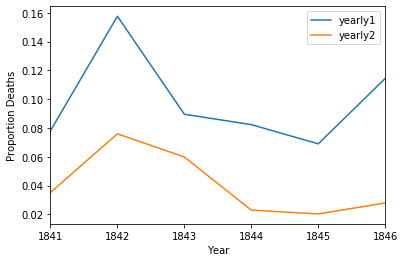

In [14]:
ax = yearly1.plot(x='year',y='proportion_deaths',label='yearly1')
yearly2.plot(x='year',y='proportion_deaths',label='yearly2', ax=ax)
ax.set_ylabel('Proportion Deaths')
ax.set_xlabel('Year')

# Task 4

In [15]:
monthly=pd.read_csv("monthly_deaths.csv", parse_dates=["date"])

In [16]:
monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [17]:
monthly["proportion_deaths"]=monthly["deaths"]/monthly["births"]

In [18]:
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


# Task 5

Text(0, 0.5, 'Proportion deaths')

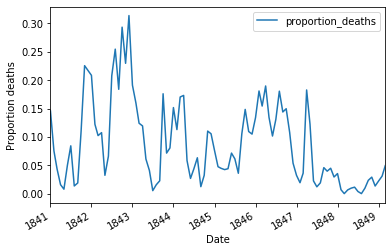

In [19]:
ax = monthly.plot(x='date',y='proportion_deaths')
ax.set_xlabel("Date")
ax.set_ylabel('Proportion deaths')

# Task 6

In [21]:
handwashing_start = pd.to_datetime('1847-06-01')

In [24]:
before_washing = monthly[monthly['date'] < handwashing_start]

In [27]:
after_washing = monthly[monthly['date']>= handwashing_start]

Text(0.5, 0, 'Date')

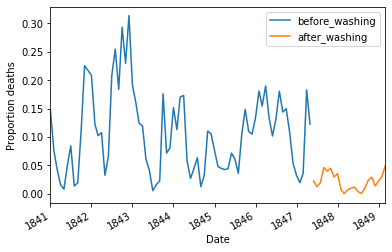

In [28]:
ax=before_washing.plot(x='date',y='proportion_deaths',label='before_washing')
after_washing.plot(x='date',y='proportion_deaths',label='after_washing', ax=ax)
ax.set_ylabel('Proportion deaths')
ax.set_xlabel('Date')

# Task 7

In [31]:
before_proportion = before_washing['proportion_deaths']

In [32]:
after_proportion = after_washing['proportion_deaths']

In [33]:
mean_diff = after_proportion.mean()-before_proportion.mean()

In [34]:
mean_diff

-0.0839566075118334

# Task 8

In [35]:
boot_mean_diff = []

In [45]:
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True) 
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

In [47]:
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])

In [48]:
confidence_interval

0.025   -0.101580
0.975   -0.067355
dtype: float64

# Task 9

In [49]:
doctors_should_wash_their_hands = True